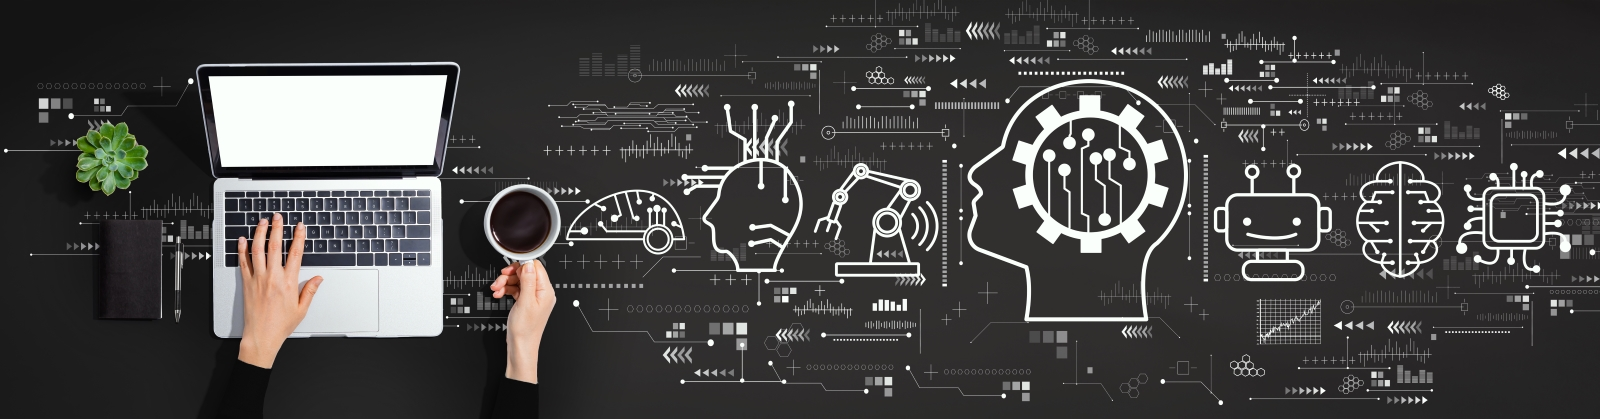


## $\color{Pink}{\text{Table of Contents}}$

* [Chapter 1. Reading the Data](#chapter1)     
* [Chapter 2. EDA](#chapter2)
    * [Section 2.1 Target Function](#section_2_1)
    * [Section 2.1 Features](#section_2_2)
* [Chapter 3. XGBOOST](#chapter3)





 ### ****$\color{orange}{\text{If You like my work, Please upvote!}}$****

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
import warnings
!pip install plotly==3.10.0
from plotly.offline import iplot
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
# evaluate an xgboost regression model on the housing dataset
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
import scipy.stats as ss   #Statistic 
test_path = r"/kaggle/input/tabular-playground-series-aug-2021/test.csv"
train_path = r"/kaggle/input/tabular-playground-series-aug-2021/train.csv"
submission_path = r"/kaggle/input/tabular-playground-series-aug-2021/sample_submission.csv"

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
submission = pd.read_csv(submission_path)

* The original dataset deals with calculating the loss associated with a loan defaults. However, this data set is prepared synthetically by the owner.

Drop the id columns from test and train dataframes. The shape of the train is +1 according to test since it has the target feature already, which is "loss". We will divide it later as target funtion.

## $\color{Pink}{\text{Chapter 1. Reading the Data}}$ <a class="anchor" id="chapter1"></a>

In [ ]:
train_backup = train.iloc[:,1:-1]
train=train.iloc[:,1:]
test=test.iloc[:,1:]
print('train shape is: ',train.shape)
print('test shape is: ',test.shape)

In [ ]:
train.describe()

Target is loss. And we have 100 features. 

* Loss  feature is consist of integers between 0 to 42. So that we can yield with a regression problem as well as a 43 classes Classification problem. Since we do not know about the submission document, it will be to take the problem as a regression problem which predicts an integer at the end of the progress.

In [ ]:
y = train["loss"]
x = train.iloc[:,:-1]
print(type(x),type(y))
print( x.shape,y.shape)

## $\color{Pink}{\text{Chapter 2. EDA}}$ <a class="anchor" id="chapter2"></a>



In [ ]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
plt.figure(figsize = (14, 15))
plt.title('Corelation matrix for Train data')
sns.heatmap(corr, mask = mask, cmap = 'BuPu', linewidths = .5)
plt.show()

## Section 1.1 Target Function <a class="anchor"  id="section1_1"></a>

In [ ]:
y_numpy =y.values
uniqueValues, occurCount = np.unique(y_numpy, return_counts=True)
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

In [ ]:
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from plotly.tools import FigureFactory as FF
import plotly.plotly as py
import plotly.graph_objs as go
import scipy

trace = go.Histogram(x=y_numpy, xbins=dict(start=np.min(y_numpy), size=0.20, end=np.max(y_numpy)), marker=dict(color='rgb(90, 20, 100)'))
layout = go.Layout(title="Histogram Frequency Counts")
fig = go.Figure(data=go.Data([trace]), layout=layout)
fig.show()

## Section 1.2 Features <a class="anchor"  id="section1_2"></a>

**Kruskal-Wallis H-test**

The Kruskal-Wallis H test is also called the "one-way ANOVA on ranks". It is a rank-based nonparametric test that can be used to determine if there are statistically significant differences between two or more groups of an independent variable on a continuous or ordinal dependent variable.

In [ ]:
list_features = []
features = train.iloc[:,:-1]
for f in features.columns:
    list_features.append(f)
print(list_features)

In [ ]:
import scipy.stats as ss   #Statistic 
for var in list_features:
    gp = train[[var, 'loss']].groupby(['loss'])
    gp_array = [group[var].to_numpy() for name, group in gp]
    kstat, p = ss.kruskal(*gp_array)
    kstat, p = round(kstat, 6), round(p, 6)
    print(f'For variable {var}, Kruskal-Wallis H-test: {kstat} and p value: {p}')
    

For variable f86, Kruskal-Wallis H-test: 31.875142 and p value: 0.871632

For variable f89, Kruskal-Wallis H-test: 34.47002 and p value: 0.788896

For variable f75, Kruskal-Wallis H-test: 43.202076 and p value: 0.419733

For variable f56, Kruskal-Wallis H-test: 45.18417 and p value: 0.340395

For variable f22, Kruskal-Wallis H-test: 45.675884 and p value: 0.321954

For variable f33, Kruskal-Wallis H-test: 45.912215 and p value: 0.313287

For variable f36, Kruskal-Wallis H-test: 46.999991 and p value: 0.275116

For variable f83, Kruskal-Wallis H-test: 47.622653 and p value: 0.254592

For variable f45, Kruskal-Wallis H-test: 49.111712 and p value: 0.20958

For variable f0, Kruskal-Wallis H-test: 53.062508 and p value: 0.117774

For variable f87, Kruskal-Wallis H-test: 53.092827 and p value: 0.117216

For variable f14, Kruskal-Wallis H-test: 53.603765 and p value: 0.108125

In [ ]:
train1 = train.iloc[:,:-1]

## Standart Scaling

Standart Scaling is neccessary for the scale dimention differences. Since the corresponding data has scale differences, we will apply standard scale

In [ ]:
from sklearn.preprocessing import RobustScaler, QuantileTransformer, StandardScaler

#sc = StandardScaler()
#train1  = sc.fit_transform(train1)
#test = sc.transform(test)

## $\color{Pink}{\text{Chapter 3. XGBOOST}}$ <a class="anchor" id="chapter3"></a>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( train1 , y, test_size=0.1)

Xgboost

* n_estimators: The number of trees in the ensemble, often increased until no further improvements are seen.
* max_depth: The maximum depth of each tree, often values are between 1 and 10.
* eta: The learning rate used to weight each model, often set to small values such as 0.3, 0.1, 0.01, or smaller.
* subsample: The number of samples (rows) used in each tree, set to a value between 0 and 1, often 1.0 to use all samples.
* colsample_bytree: Number of features (columns) used in each tree, set to a value between 0 and 1, often 1.0 to use all features.

Cross validation takes excessive time, after 9 hours running still processing so that i quit using cv for this dataset.

In [ ]:
import xgboost
from sklearn.model_selection import cross_validate
print(xgboost.__version__)


model = XGBRegressor(learning_rate=0.01,
                     n_estimators=800, 
                     subsample=1.0,
                     reg_alpha=3, 
                     reg_lambda=2,
                     gamma=2,
                     colsample_bytree=0.6,
                     tree_method = 'gpu_hist')


In [ ]:
model.fit(x_train, y_train)

In [ ]:
def modelscorer(model, x_test, y_test):
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    print('R2: ', r2)
    mse = metrics.mean_squared_error(y_test, y_pred, squared=False)
    rmse=mse**(0.5)
    print('RMSE: ', rmse)
    return r2, rmse

modelscorer(model, x_test, y_test)

#### Submission format setting 

In [ ]:
y_submission=model.predict(test)
pred = pd.read_csv("../input/tabular-playground-series-aug-2021/sample_submission.csv")
pred.loss = y_submission
pred.head()

In [ ]:
pred.to_csv('submission.csv', index=False)

## Feature Importance

In [ ]:

model_imp = model.feature_importances_
x = np.arange(0, len(train_backup.columns))
height = 0.3
fig, ax = plt.subplots(figsize=(10, 15))
bars1 = ax.barh(x-height, model_imp, height=height,
                color="cornflowerblue",
                edgecolor="black",
                label='loss')
ax.set_title("Feature importances", fontsize=20, pad=5)
ax.set_ylabel("Feature names", fontsize=15, labelpad=5)
ax.set_xlabel("Feature importance", fontsize=15, labelpad=5)
ax.set_yticks(x)
ax.set_yticklabels(train_backup.columns, fontsize=8)
ax.tick_params(axis="x", labelsize=10)
ax.grid(axis="x")
ax.legend(fontsize=13, loc="lower right")
plt.margins(0.04, 0.01)
plt.gca().invert_yaxis()
